# Introduction

### About the company
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused sma products. Bellabeat product is collecting data on  activity, sleep, stress, and reprodutive health that allowed Bellabeat to empower women with knowledge about their own health and habits. 

### Products
* **Bellabeat app**: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. The Bellabeat app connects to their line of smart wellness products.

* **Leaf**: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. 
 
* **Time**: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. 

* **Spring**: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day to track your hydration levels.

* **Bellabeat membership**: Bellabeat also offers a subscription-based membership program for users that gives 24/7 access.

#  Ask

### Identify the business task
Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. 
1. find some trends in smart device usage
2. how could these trend apply to Bellabeat customers
3. How could these trends help influence Bellabeat marketing strategy

### Consider key stakeholders
Srsen ask the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. 

#  Prepare
* ### Where the data stored

In [1]:
install.packages("pheatmap")

Installing package into 'C:/Users/Ayunda/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'pheatmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ayunda\AppData\Local\Temp\RtmpmASaDn\downloaded_packages


In [2]:
library(dplyr)
library(tidyverse)
library(ggplot2)
library(lubridate)
library(pheatmap)
library(reshape2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




In [105]:
daily_activities <- read.csv("C:\\Users\\Ayunda\\OneDrive\\Documents\\course\\google data anlytics\\dataset\\Fitbitfitnesstracker\\mturkfitbit_export_4.12.16-5.12.16\\Fitabase Data 4.12.16-5.12.16\\dailyActivity_merged.csv")
dailyCalories <- read.csv("C:\\Users\\Ayunda\\OneDrive\\Documents\\course\\google data anlytics\\dataset\\Fitbitfitnesstracker\\mturkfitbit_export_4.12.16-5.12.16\\Fitabase Data 4.12.16-5.12.16\\dailyCalories_merged.csv")
dailyIntensities <- read.csv("C:\\Users\\Ayunda\\OneDrive\\Documents\\course\\google data anlytics\\dataset\\Fitbitfitnesstracker\\mturkfitbit_export_4.12.16-5.12.16\\Fitabase Data 4.12.16-5.12.16\\dailyIntensities_merged.csv")
dailySteps <- read.csv("C:\\Users\\Ayunda\\OneDrive\\Documents\\course\\google data anlytics\\dataset\\Fitbitfitnesstracker\\mturkfitbit_export_4.12.16-5.12.16\\Fitabase Data 4.12.16-5.12.16\\dailySteps_merged.csv")
sleep_day <- read.csv("C:\\Users\\Ayunda\\OneDrive\\Documents\\course\\google data anlytics\\dataset\\Fitbitfitnesstracker\\mturkfitbit_export_4.12.16-5.12.16\\Fitabase Data 4.12.16-5.12.16\\sleepDay_merged.csv")
weightLogInfo <- read.csv("C:\\Users\\Ayunda\\OneDrive\\Documents\\course\\google data anlytics\\dataset\\Fitbitfitnesstracker\\mturkfitbit_export_4.12.16-5.12.16\\Fitabase Data 4.12.16-5.12.16\\weightLogInfo_merged.csv")
hourlySteps <- read.csv("C:\\Users\\Ayunda\\OneDrive\\Documents\\course\\google data anlytics\\dataset\\Fitbitfitnesstracker\\mturkfitbit_export_4.12.16-5.12.16\\Fitabase Data 4.12.16-5.12.16\\hourlySteps_merged.csv")
hourlyCalories <- read.csv("C:\\Users\\Ayunda\\OneDrive\\Documents\\course\\google data anlytics\\dataset\\Fitbitfitnesstracker\\mturkfitbit_export_4.12.16-5.12.16\\Fitabase Data 4.12.16-5.12.16\\hourlyCalories_merged.csv")
hourlyIntensities <- read.csv("C:\\Users\\Ayunda\\OneDrive\\Documents\\course\\google data anlytics\\dataset\\Fitbitfitnesstracker\\mturkfitbit_export_4.12.16-5.12.16\\Fitabase Data 4.12.16-5.12.16\\hourlyIntensities_merged.csv")
heartrates <- read.csv("C:\\Users\\Ayunda\\OneDrive\\Documents\\course\\google data anlytics\\dataset\\Fitbitfitnesstracker\\mturkfitbit_export_4.12.16-5.12.16\\Fitabase Data 4.12.16-5.12.16\\heartrate_seconds_merged.csv")

* ### Organized the data

In [123]:

# Konversi kolom waktu ke format POSIXct
heartrates$Time <- as.POSIXct(heartrates$Time, format = "%m/%d/%Y %I:%M:%S %p")
glimpse(heartrates)


Rows: 2,483,658
Columns: 3
$ Id    <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022…
$ Time  <dttm> 2016-04-12 07:21:00, 2016-04-12 07:21:05, 2016-04-12 07:21:10, …
$ Value <int> 97, 102, 105, 103, 101, 95, 91, 93, 94, 93, 92, 89, 83, 61, 60, …


In [124]:
# Membulatkan waktu ke jam terdekat
heartrates$Hour <- format(heartrates$Time, "%Y-%m-%d %H:00:00")
heartrates$Hour <- as.POSIXct(heartrates$Hour, format = "%Y-%m-%d %H:%M:%S")

heartrates$Hour <- format(heartrates$Hour, format = "%H:%M")
glimpse(heartrates)

Rows: 2,483,658
Columns: 4
$ Id    <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022…
$ Time  <dttm> 2016-04-12 07:21:00, 2016-04-12 07:21:05, 2016-04-12 07:21:10, …
$ Value <int> 97, 102, 105, 103, 101, 95, 91, 93, 94, 93, 92, 89, 83, 61, 60, …
$ Hour  <chr> "07:00", "07:00", "07:00", "07:00", "07:00", "07:00", "07:00", "…


In [85]:
# Rata-rata heartrate per jam per user
hourly_heartrates <- heartrates %>%
  group_by(Id, Hour) %>%
  summarise(AvgHeartRate = mean(Value, na.rm = TRUE)) %>%
  ungroup()

# Melihat hasil

hourly_heartrates

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Id,Hour,AvgHeartRate
<dbl>,<chr>,<dbl>
2022484408,06:00,71.52259
2022484408,07:00,79.07781
2022484408,08:00,73.80603
2022484408,09:00,93.12507
2022484408,10:00,89.67264
2022484408,11:00,78.41452
2022484408,12:00,76.36505
2022484408,13:00,78.31582
2022484408,14:00,87.93895


In [75]:

hourlyIntensities$Time <- as.POSIXct(hourlyIntensities$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p")
hourlyIntensities$Hour <- format(hourlyIntensities$Time, "%Y-%m-%d %H:00:00")
hourlyIntensities$Hour <- as.POSIXct(hourlyIntensities$Hour, format = "%Y-%m-%d %H:%M:%S")

hourlyIntensities$Hour <- format(hourlyIntensities$Hour, format = "%H:%M")
glimpse(hourlyIntensities)


Rows: 22,099
Columns: 6
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityHour     <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/1…
$ TotalIntensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…
$ Time             <dttm> 2016-04-12 00:00:00, 2016-04-12 01:00:00, 2016-04-12…
$ Hour             <chr> "00:00", "01:00", "02:00", "03:00", "04:00", "05:00",…


In [87]:
# Rata-rata heartrate per jam per user
hourly_intensities <- hourlyIntensities %>%
  group_by(Id, Hour) %>%
  summarise(AvgIntensity = mean(TotalIntensity, na.rm = TRUE)) %>%
  ungroup()

# Melihat hasil
hourly_intensities


`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Id,Hour,AvgIntensity
<dbl>,<chr>,<dbl>
1503960366,00:00,7.4000000
1503960366,01:00,3.5000000
1503960366,02:00,1.7666667
1503960366,03:00,0.9333333
1503960366,04:00,0.3333333
1503960366,05:00,0.1666667
1503960366,06:00,1.0000000
1503960366,07:00,2.6000000
1503960366,08:00,9.1000000


In [119]:
head(daily_activities)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [112]:
# sleep_day$Date <- as.POSIXct(sleep_day$SleepDay , format = "%m/%d/%Y %I:%M:%S %p")
dailyIntensities<- dailyIntensities%>%
rename(Date=ActivityDay)

dailyIntensities$Date <- as.POSIXct(dailyIntensities$Date , format = "%m/%d/%Y")

sleep_day <- sleep_day %>%
  separate(SleepDay, into = c("Date", "Hour"), sep = " ")

sleep_day$Date <- as.POSIXct(sleep_day$Date , format = "%m/%d/%Y ")
sleep_day$Hour <- as.POSIXct(sleep_day$Hour , format = "%I:%M:%S %p")

# hourlyIntensities$Hour <- format(sleep_day$Hour, "%Y-%m-%d %H:00:00")
# hourlyIntensities$Hour <- as.POSIXct(hourlyIntensities$Hour, format = "%Y-%m-%d %H:%M:%S")

Warning message:
"Expected 2 pieces. Additional pieces discarded in 413 rows [1, 2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...]."


In [113]:

sleep_day$Date <- as.POSIXct(sleep_day$Date , format = "%m/%d/%Y ")
glimpse(sleep_day)
glimpse(dailyIntensities)

Rows: 413
Columns: 6
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ Date               <dttm> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-16, 20…
$ Hour               <dttm> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…
Rows: 940
Columns: 10
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ Date                     <dttm> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ SedentaryMinutes         <int> 728, 776, 1218, 726, 773, 539, 1149, 775, 818…
$ LightlyActiveMinutes     <int> 328, 217, 181, 209, 221, 164, 233, 264, 205, …
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 

In [17]:
hourlySteps$Hour <- as.POSIXct(hourlySteps$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p")

hourlySteps$Time <- format(hourlySteps$Hour, format = "%H:%M")
hourly_Steps <- hourlySteps %>%
  group_by(Id, Time) %>%
  summarise(AvgStepTotal = mean(StepTotal, na.rm = TRUE)) %>%
  ungroup()

head(hourly_Steps)

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Id,Time,AvgStepTotal
<dbl>,<chr>,<dbl>
1503960366,00:00,142.66667
1503960366,01:00,50.10000
1503960366,02:00,29.00000
1503960366,03:00,11.83333
1503960366,04:00,3.60000
1503960366,05:00,2.10000


In [18]:
hourlyCalories$Hour <- as.POSIXct(hourlyCalories$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p")


In [21]:

hourlyCalories$Time <- format(hourlyCalories$Hour, format = "%H:%M")

In [22]:
hourly_Calories <- hourlyCalories %>%
  group_by(Id, Time) %>%
  summarise(AvgCalories = mean(Calories, na.rm = TRUE)) %>%
  ungroup()
  
head(hourly_Calories)

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Id,Time,AvgCalories
<dbl>,<chr>,<dbl>
1503960366,00:00,60.96667
1503960366,01:00,53.86667
1503960366,02:00,50.26667
1503960366,03:00,48.63333
1503960366,04:00,47.70000
1503960366,05:00,47.56667


In [125]:
head(heartrates)

,Id,Time,Value,Hour
,<dbl>,<dttm>,<int>,<chr>
1,2022484408,2016-04-12 07:21:00,97,07:00
2,2022484408,2016-04-12 07:21:05,102,07:00
3,2022484408,2016-04-12 07:21:10,105,07:00
4,2022484408,2016-04-12 07:21:20,103,07:00
5,2022484408,2016-04-12 07:21:25,101,07:00
6,2022484408,2016-04-12 07:22:05,95,07:00


In [126]:

daily_activities$Date <- as.POSIXct(daily_activities$ActivityDate , format = "%m/%d/%Y")
heartrates$Date <- format(heartrates$Time, "%Y-%m-%d")

In [127]:
n_distinct(heartrates$Id)
n_distinct(daily_activities$Id)
n_distinct(dailyCalories$Id)
n_distinct(dailySteps$Id)
n_distinct(dailyIntensities$Id)
n_distinct(hourlyCalories$Id)
n_distinct(hourlyIntensities$Id)
n_distinct(hourlySteps$Id)
n_distinct(sleep_day$Id)
n_distinct(weightLogInfo$Id)

# Id_hr <- unique(heartrates$Id)
# Id_hr

# id_da <- unique(daily_activities$Id)
# id_da

# id_sl <- unique(sleep_day$Id)
# id_sl

# id_wl <- unique(weightLogInfo$Id)
# id_wl

# common_ids <- Reduce(intersect, list(id_da, id_sl, Id_hr))
# print(common_ids)

# yang irisan kalo : hr 12, sleep 24, weight 3

# n_distinct(daily_activities$Date)
# n_distinct(heartrates$Date)
# n_distinct(sleep_day$Date)
# n_distinct(weightLogInfo$Date)

# aslinya lo dia cm daily act doang yg full tgl nya, yg lain ga tiap hari keisi
# daily_activities<- daily_activities%>%
# rename(Date=ActivityDate)


weightLogInfo <- weightLogInfo %>%
  separate(Date, into = c("Date", "Time"), sep = " ")
head(weightLogInfo)

# Hitung jumlah tanggal unik untuk setiap Id
result_s <- sleep_day %>%
  group_by(Id) %>%
  summarise(Unique_Dates = n_distinct(Date))

print(result_s, n=24)

result_a <- daily_activities %>%
  group_by(Id) %>%
  summarise(Unique_Dates = n_distinct(Date))

print(result_a, n=33)

result_w <- weightLogInfo %>%
  group_by(Id) %>%
  summarise(Unique_Dates = n_distinct(Date))

print(result_w)

result_h <- heartrates %>%
  group_by(Id) %>%
  summarise(Unique_Dates = n_distinct(Date))

print(result_h)

[1] 14

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

Warning message:
"Expected 2 pieces. Missing pieces filled with `NA` in 67 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...]."


,Id,Date,Time,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016,NA,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016,NA,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016,NA,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016,NA,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016,NA,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016,NA,72.4,159.6147,25,27.45,True,1.460938e+12


# A tibble: 24 × 2
           Id Unique_Dates
        <dbl>        <int>
 1 1503960366           25
 2 1644430081            4
 3 1844505072            3
 4 1927972279            5
 5 2026352035           28
 6 2320127002            1
 7 2347167796           15
 8 3977333714           28
 9 4020332650            8
10 4319703577           26
11 4388161847           23
12 4445114986           28
13 4558609924            5
14 4702921684           27
15 5553957443           31
16 5577150313           26
17 6117666160           18
18 6775888955            3
19 6962181067           31
20 7007744171            2
21 7086361926           24
22 8053475328            3
23 8378563200           31
24 8792009665           15
# A tibble: 33 × 2
           Id Unique_Dates
        <dbl>        <int>
 1 1503960366           31
 2 1624580081           31
 3 1644430081           30
 4 1844505072           31
 5 1927972279           31
 6 2022484408           31
 7 2026352035           31
 8 2320127002    

* ### Determine the credibility of the data
This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences. 

ada dataset yang tanggalnya ga lengkap jd beberapa missing data, dan kalo diterus2ke dimerge sm yg lain yg ada hasilnya krg akurat, yg daily2 semua lengkap, kalo daily x sleep ada 24 id lengkap tp sleepnnya tglnya ga lengkap, kalo daily x sleep x hr jadi 12 id tapi hr nya tglnya ga lengkap, apalagi klo sm weightlog cuma dpt 3 doang. jd weightllog gabakal dipke disini.

#  Process And Analyze

* ### Check the data for errors

In [94]:
str(sleep_day)

'data.frame':	413 obs. of  6 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ Date              : POSIXct, format: "2016-04-11" "2016-04-12" ...
 $ Hour              : POSIXct, format: NA NA ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


In [128]:
daily_activities_with_ud <- daily_activities %>%
  left_join(result_a, by = "Id")

sleep_day_with_ud <- sleep_day %>%
  left_join(result_s, by = "Id")

heartrates_with_ud <- heartrates %>%
  left_join(result_h, by = "Id")

In [130]:
# hapus baris yg byk kosong dan ga relate satu sama lain
# karena banyak data kosong di tiap tanggalnya maka difilter yg byknya > 15 aja diolah

# sleep
filtered_sleep <- sleep_day_with_ud %>% filter(Unique_Dates > 10)
head(filtered_sleep)
# distinct(filtered_sleep, Unique_Dates)

# daily activities
filtered_da <- daily_activities_with_ud %>% filter(Unique_Dates > 10)
head(filtered_da)

# heart rates
filtered_hr <- heartrates_with_ud %>% filter(Unique_Dates > 10)
head(filtered_hr)
glimpse(filtered_hr)

,Id,Date,Hour,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Unique_Dates
,<dbl>,<dttm>,<dttm>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,NA,1,327,346,25
2,1503960366,2016-04-13,NA,2,384,407,25
3,1503960366,2016-04-15,NA,1,412,442,25
4,1503960366,2016-04-16,NA,2,340,367,25
5,1503960366,2016-04-17,NA,1,700,712,25
6,1503960366,2016-04-19,NA,1,304,320,25


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date,Unique_Dates
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dttm>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12,31
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13,31
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,2016-04-14,31
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15,31
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16,31
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17,31


,Id,Time,Value,Hour,Date,Unique_Dates
,<dbl>,<dttm>,<int>,<chr>,<chr>,<int>
1,2022484408,2016-04-12 07:21:00,97,07:00,2016-04-12,31
2,2022484408,2016-04-12 07:21:05,102,07:00,2016-04-12,31
3,2022484408,2016-04-12 07:21:10,105,07:00,2016-04-12,31
4,2022484408,2016-04-12 07:21:20,103,07:00,2016-04-12,31
5,2022484408,2016-04-12 07:21:25,101,07:00,2016-04-12,31
6,2022484408,2016-04-12 07:22:05,95,07:00,2016-04-12,31


Rows: 2,481,168
Columns: 6
$ Id           <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 202248440…
$ Time         <dttm> 2016-04-12 07:21:00, 2016-04-12 07:21:05, 2016-04-12 07:…
$ Value        <int> 97, 102, 105, 103, 101, 95, 91, 93, 94, 93, 92, 89, 83, 6…
$ Hour         <chr> "07:00", "07:00", "07:00", "07:00", "07:00", "07:00", "07…
$ Date         <chr> "2016-04-12", "2016-04-12", "2016-04-12", "2016-04-12", "…
$ Unique_Dates <int> 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 3…


* ### Transform the data

In [60]:
# TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories

sum_dailyactivities <- filtered_da %>%
  group_by(Date) %>%
  drop_na() %>%  # Hanya drop NA dari kolom relevan
  summarise(
    TotalSteps = mean(TotalSteps, na.rm = TRUE),
    TotalDistance = mean(TotalDistance, na.rm = TRUE),
    VeryActiveDistance =  mean(VeryActiveDistance, na.rm=TRUE),
    ModeratelyActiveDistance = mean(ModeratelyActiveDistance, na.rm=TRUE),
    LightActiveDistance = mean(LightActiveDistance,  na.rm=TRUE),
    Calories = mean(Calories, na.rm=TRUE),
    SedentaryActiveDistance = mean(SedentaryActiveDistance, na.rm=TRUE),
    VeryActiveMinutes = mean(VeryActiveMinutes, na.rm = TRUE),
    FairlyActiveMinutes =  mean(FairlyActiveMinutes, na.rm=TRUE),
    LightlyActiveMinutes = mean(LightlyActiveMinutes, na.rm=TRUE),
    SedentaryMinutes = mean(SedentaryMinutes,  na.rm=TRUE))

sum_dailyactivities

Date,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,Calories,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016-04-12,8325.688,6.043750,1.8834375,0.3568750,3.393437,2393.969,0.0003125000,23.000000,8.093750,200.09375,1018.4062
2016-04-13,7237.000,5.123125,1.3681250,0.4331250,3.102500,2286.031,0.0015625000,20.968750,10.906250,182.43750,1013.7188
2016-04-14,7985.562,5.774375,1.5568750,0.5256250,3.680000,2374.531,0.0021875000,21.593750,12.781250,207.28125,996.5938
2016-04-15,7644.781,5.360937,1.0821875,0.4084375,3.808750,2381.062,0.0015625000,19.687500,10.000000,217.78125,963.8125
2016-04-16,8679.156,6.291563,1.9937500,0.7087500,3.450625,2392.938,0.0015625000,27.843750,15.125000,193.81250,1002.6562
2016-04-17,6409.250,4.540625,1.1453125,0.4975000,2.822188,2230.969,0.0006250000,18.906250,11.843750,165.34375,1049.9688
2016-04-18,7896.969,5.657812,1.6656250,0.6959375,3.281250,2333.375,0.0015625000,24.406250,16.125000,188.28125,1061.2188
2016-04-19,8048.656,5.871875,1.8831250,0.5190625,3.463437,2359.094,0.0009375000,23.968750,13.781250,201.90625,1003.9375
2016-04-20,8162.969,5.950313,1.8618750,0.6334375,3.450938,2395.219,0.0018750000,24.187500,18.750000,203.59375,974.1250


In [61]:
glimpse(sum_dailyactivities)

Rows: 31
Columns: 12
$ Date                     <dttm> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ TotalSteps               <dbl> 8325.688, 7237.000, 7985.562, 7644.781, 8679.…
$ TotalDistance            <dbl> 6.043750, 5.123125, 5.774375, 5.360937, 6.291…
$ VeryActiveDistance       <dbl> 1.8834375, 1.3681250, 1.5568750, 1.0821875, 1…
$ ModeratelyActiveDistance <dbl> 0.3568750, 0.4331250, 0.5256250, 0.4084375, 0…
$ LightActiveDistance      <dbl> 3.393437, 3.102500, 3.680000, 3.808750, 3.450…
$ Calories                 <dbl> 2393.969, 2286.031, 2374.531, 2381.062, 2392.…
$ SedentaryActiveDistance  <dbl> 0.0003125000, 0.0015625000, 0.0021875000, 0.0…
$ VeryActiveMinutes        <dbl> 23.00000, 20.96875, 21.59375, 19.68750, 27.84…
$ FairlyActiveMinutes      <dbl> 8.09375, 10.90625, 12.78125, 10.00000, 15.125…
$ LightlyActiveMinutes     <dbl> 200.0938, 182.4375, 207.2812, 217.7812, 193.8…
$ SedentaryMinutes         <dbl> 1018.4062, 1013.7188, 996.5938, 963.8125, 100…


In [62]:
wday_da <- sum_dailyactivities %>%
mutate(Date = ymd(Date)) %>%
mutate(Weekday = wday(Date, label = TRUE, abbr = FALSE))

head(wday_da)


Date,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,Calories,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Weekday
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
2016-04-12,8325.688,6.043750,1.883438,0.3568750,3.393437,2393.969,0.0003125,23.00000,8.09375,200.0938,1018.4062,Tuesday
2016-04-13,7237.000,5.123125,1.368125,0.4331250,3.102500,2286.031,0.0015625,20.96875,10.90625,182.4375,1013.7188,Wednesday
2016-04-14,7985.562,5.774375,1.556875,0.5256250,3.680000,2374.531,0.0021875,21.59375,12.78125,207.2812,996.5938,Thursday
2016-04-15,7644.781,5.360937,1.082188,0.4084375,3.808750,2381.062,0.0015625,19.68750,10.00000,217.7812,963.8125,Friday
2016-04-16,8679.156,6.291563,1.993750,0.7087500,3.450625,2392.938,0.0015625,27.84375,15.12500,193.8125,1002.6562,Saturday
2016-04-17,6409.250,4.540625,1.145312,0.4975000,2.822188,2230.969,0.0006250,18.90625,11.84375,165.3438,1049.9688,Sunday


In [63]:
wday_da <- wday_da %>%
group_by(Weekday)%>%
drop_na()%>%
summarise(
    TotalSteps = mean(TotalSteps, na.rm = TRUE),
    TotalDistance = mean(TotalDistance, na.rm = TRUE),
    Calories = mean(Calories, na.rm=TRUE),
    VeryActiveDistance =  mean(VeryActiveDistance, na.rm=TRUE),
    ModeratelyActiveDistance = mean(ModeratelyActiveDistance, na.rm=TRUE),
    LightActiveDistance = mean(LightActiveDistance,  na.rm=TRUE),
    SedentaryActiveDistance = mean(SedentaryActiveDistance, na.rm=TRUE),
    VeryActiveMinutes = mean(VeryActiveMinutes, na.rm = TRUE),
    FairlyActiveMinutes =  mean(FairlyActiveMinutes, na.rm=TRUE),
    LightlyActiveMinutes = mean(LightlyActiveMinutes, na.rm=TRUE),
    SedentaryMinutes = mean(SedentaryMinutes,  na.rm=TRUE))

wday_da

# habis ini baru diekstrak masing2 kebutuhanya 
# cal-distance
# step-distances


Weekday,TotalSteps,TotalDistance,Calories,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sunday,6937.183,5.030781,2264.071,1.486788,0.6234670,2.893539,0.0006458333,19.91123,14.65822,174.1844,988.4248
Monday,7782.003,5.555207,2323.513,1.530398,0.5877758,3.368345,0.0025699433,22.93333,14.03847,192.2923,1025.9133
Tuesday,8143.698,5.842190,2353.536,1.615271,0.6057749,3.468035,0.0015341512,23.18092,14.59629,196.9882,1003.9712
Wednesday,7552.370,5.484736,2296.607,1.637001,0.5344720,3.244462,0.0013110632,20.80560,13.21509,189.5857,983.4949
Thursday,7207.230,5.165165,2133.365,1.331465,0.4841509,3.220997,0.0022223932,18.53314,11.42448,181.0352,939.0237
Friday,7476.336,5.331810,2339.088,1.326899,0.4851212,3.496148,0.0018615301,20.19720,12.14009,205.0531,1001.8004
Saturday,8131.006,5.839485,2352.568,1.510018,0.6775388,3.606981,0.0010337875,21.87594,15.18478,206.6271,963.8406


In [132]:
daily_Intensities <- dailyIntensities %>%
  group_by(Id, Date) %>%
  summarise(SedentaryMinutes = mean(SedentaryMinutes, na.rm = TRUE),
  LightlyActiveMinutes = mean(LightlyActiveMinutes, na.rm = TRUE),
  FairlyActiveMinutes = mean(FairlyActiveMinutes, na.rm = TRUE),
  VeryActiveMinutes = mean(VeryActiveMinutes, na.rm = TRUE)) %>%
  ungroup()
# SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes

daily_sleep <- sleep_day %>%
  group_by(Id, Date) %>%
  summarise(TotalMinutesAsleep = mean(TotalMinutesAsleep, na.rm = TRUE)) %>%
  ungroup()

head(daily_Intensities)
head(daily_sleep)

glimpse(daily_Intensities)
glimpse(daily_sleep)

`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'Id'. You can override using the `.groups`
argument.


Id,Date,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,728,328,13,25
1503960366,2016-04-13,776,217,19,21
1503960366,2016-04-14,1218,181,11,30
1503960366,2016-04-15,726,209,34,29
1503960366,2016-04-16,773,221,10,36
1503960366,2016-04-17,539,164,20,38


Id,Date,TotalMinutesAsleep
<dbl>,<dttm>,<dbl>
1503960366,2016-04-12,327
1503960366,2016-04-13,384
1503960366,2016-04-15,412
1503960366,2016-04-16,340
1503960366,2016-04-17,700
1503960366,2016-04-19,304


Rows: 940
Columns: 6
$ Id                   <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1…
$ Date                 <dttm> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-15, …
$ SedentaryMinutes     <dbl> 728, 776, 1218, 726, 773, 539, 1149, 775, 818, 83…
$ LightlyActiveMinutes <dbl> 328, 217, 181, 209, 221, 164, 233, 264, 205, 211,…
$ FairlyActiveMinutes  <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21, 5,…
$ VeryActiveMinutes    <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 41, 3…
Rows: 410
Columns: 3
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ Date               <dttm> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-16, 20…
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…


In [135]:
# merge klo ada

# heartrates dan hourly intensities
sleep_intensities <- merge(daily_Intensities,daily_sleep, by= c("Id", "Date"), all=TRUE)

# Filter hasil merge untuk menghapus baris dengan NA di AvgHeartRate atau AvgIntensity
sleep_intensities <- sleep_intensities %>%
  filter(!is.na(SedentaryMinutes) & !is.na(LightlyActiveMinutes)& !is.na(FairlyActiveMinutes) & !is.na(VeryActiveMinutes) &!is.na(TotalMinutesAsleep)) %>%
  group_by(Id) %>%  # Mengelompokkan data berdasarkan ID
  filter(n() > 5) %>%  # Hanya menyimpan ID dengan lebih dari 5 entri
  ungroup() 
head(sleep_intensities)
glimpse(sleep_intensities)

uniqueidsi <- unique(sleep_intensities$Id)


# result_si <- sleep_intensities %>%
#   group_by(Id) %>%
#   summarise(uniqueidsi = n_distinct(Date))

# result_si

Id,Date,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,TotalMinutesAsleep
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,728,328,13,25,327
1503960366,2016-04-13,776,217,19,21,384
1503960366,2016-04-15,726,209,34,29,412
1503960366,2016-04-16,773,221,10,36,340
1503960366,2016-04-17,539,164,20,38,700
1503960366,2016-04-19,775,264,31,50,304


Rows: 384
Columns: 7
$ Id                   <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 1…
$ Date                 <dttm> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-16, …
$ SedentaryMinutes     <dbl> 728, 776, 726, 773, 539, 775, 818, 838, 732, 709,…
$ LightlyActiveMinutes <dbl> 328, 217, 209, 221, 164, 264, 205, 211, 262, 238,…
$ FairlyActiveMinutes  <dbl> 13, 19, 34, 10, 20, 31, 12, 8, 21, 5, 14, 23, 28,…
$ VeryActiveMinutes    <dbl> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 31, 4…
$ TotalMinutesAsleep   <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430,…


In [88]:
# merge klo ada

# heartrates dan hourly intensities
hr_intensities <- merge(hourly_heartrates,hourly_intensities, by= c("Id", "Hour"), all=TRUE)

# Filter hasil merge untuk menghapus baris dengan NA di AvgHeartRate atau AvgIntensity
hr_intensities <- hr_intensities %>%
  filter(!is.na(AvgHeartRate) & !is.na(AvgIntensity))

head(hr_intensities)


,Id,Hour,AvgHeartRate,AvgIntensity
,<dbl>,<chr>,<dbl>,<dbl>
1,2022484408,06:00,71.52259,2.225806
2,2022484408,07:00,79.07781,14.387097
3,2022484408,08:00,73.80603,15.967742
4,2022484408,09:00,93.12507,61.161290
5,2022484408,10:00,89.67264,55.677419
6,2022484408,11:00,78.41452,30.129032


* ### Identify trends and relationship

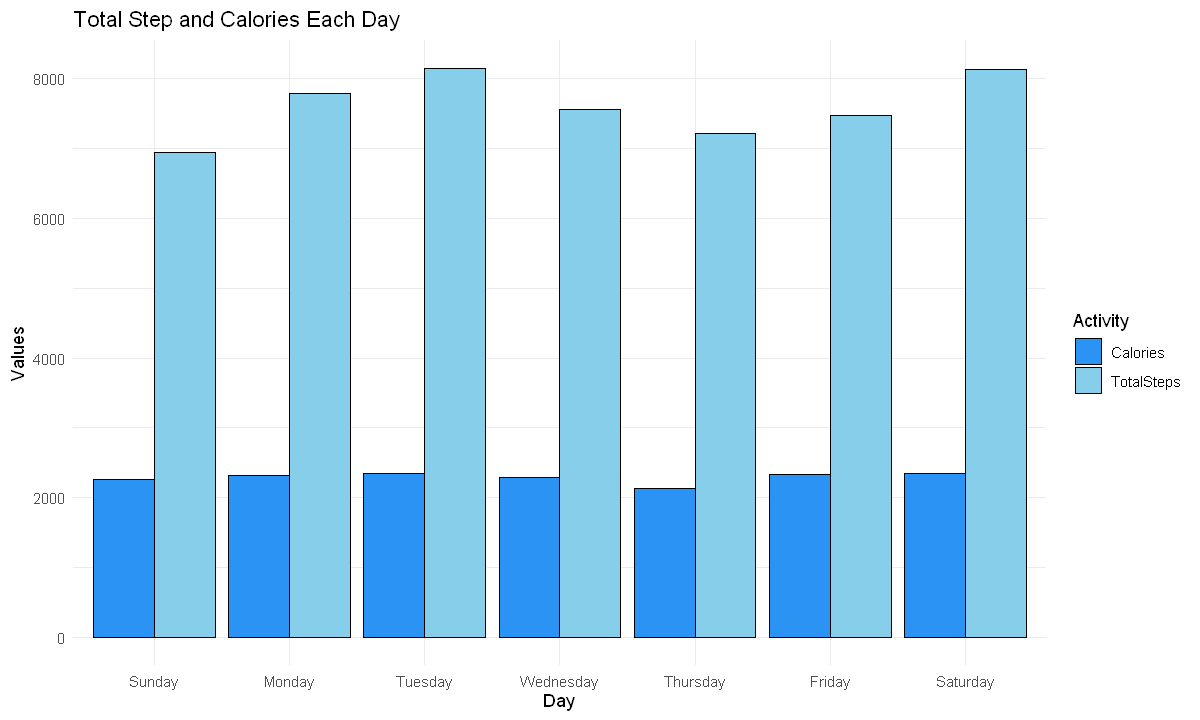

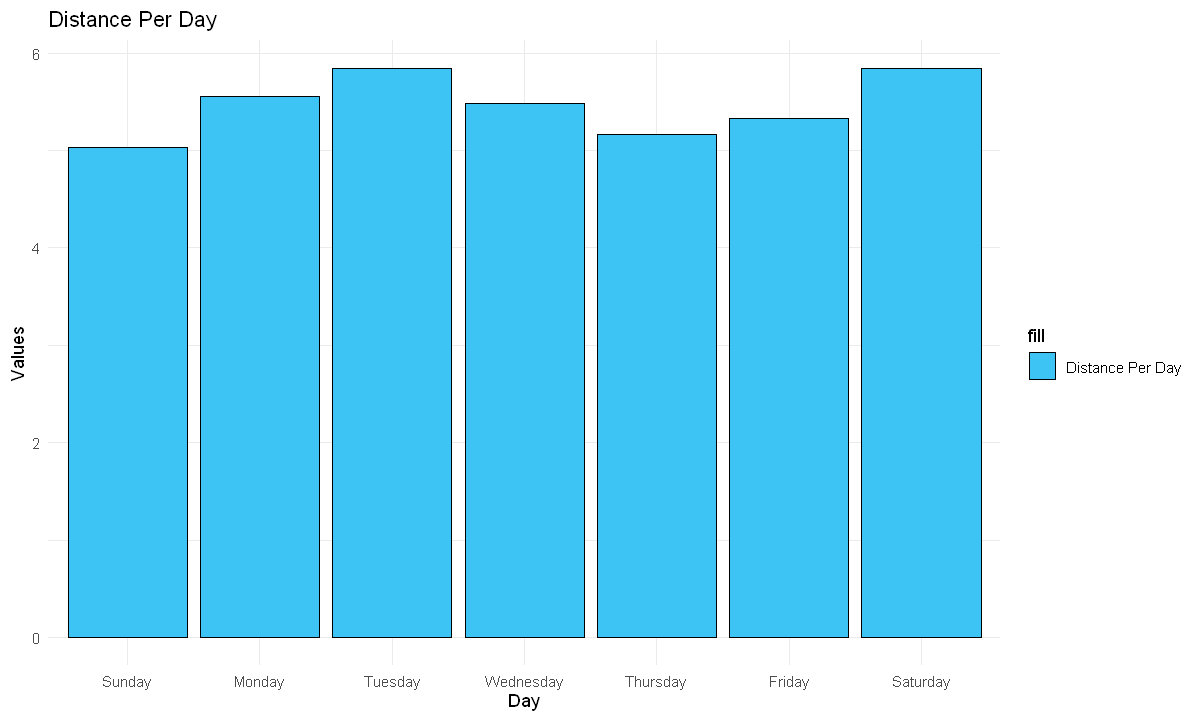

In [139]:
# plot point, line, atau bar
options(repr.plot.width=10, repr.plot.height=6)

wday_da_long <- wday_da %>%
  pivot_longer(cols = c(TotalSteps, Calories), 
               names_to = "Activity", 
               values_to = "Value")

ggplot(data = wday_da_long, aes(x = factor(Weekday), y = Value, fill = Activity)) +
  geom_bar(stat = "identity", position = "dodge", color = "black") +
  scale_fill_manual(values = c("TotalSteps" = "skyblue", "Calories" = "#2b93f4")) +
  labs(title = "Total Step and Calories Each Day",
       x = "Day",
       y = "Values") +
  theme_minimal()

ggplot(data = wday_da, aes(x = factor(Weekday),y = TotalDistance, fill = "Distance Per Day")) +  # Gunakan `factor(Id)` agar ID ditampilkan sebagai kategori
  geom_bar(stat = "identity",  color = "black") +
  scale_fill_manual(values = c("Distance Per Day" = "#3dc3f4")) +
  labs(title = "Distance Per Day",
       x = "Day",
       y = "Values") +
  theme_minimal()


### Analysis of Total Steps-Calories  
-	The highest number of steps was recorded on Tuesday and Saturday, while the lowest was on Sunday.  
-	The relationship between calories and steps is not very strong, as the type of activity performed is unknown.  
-	Total distance and steps are directly proportional; the longer the distance, the more steps taken.  

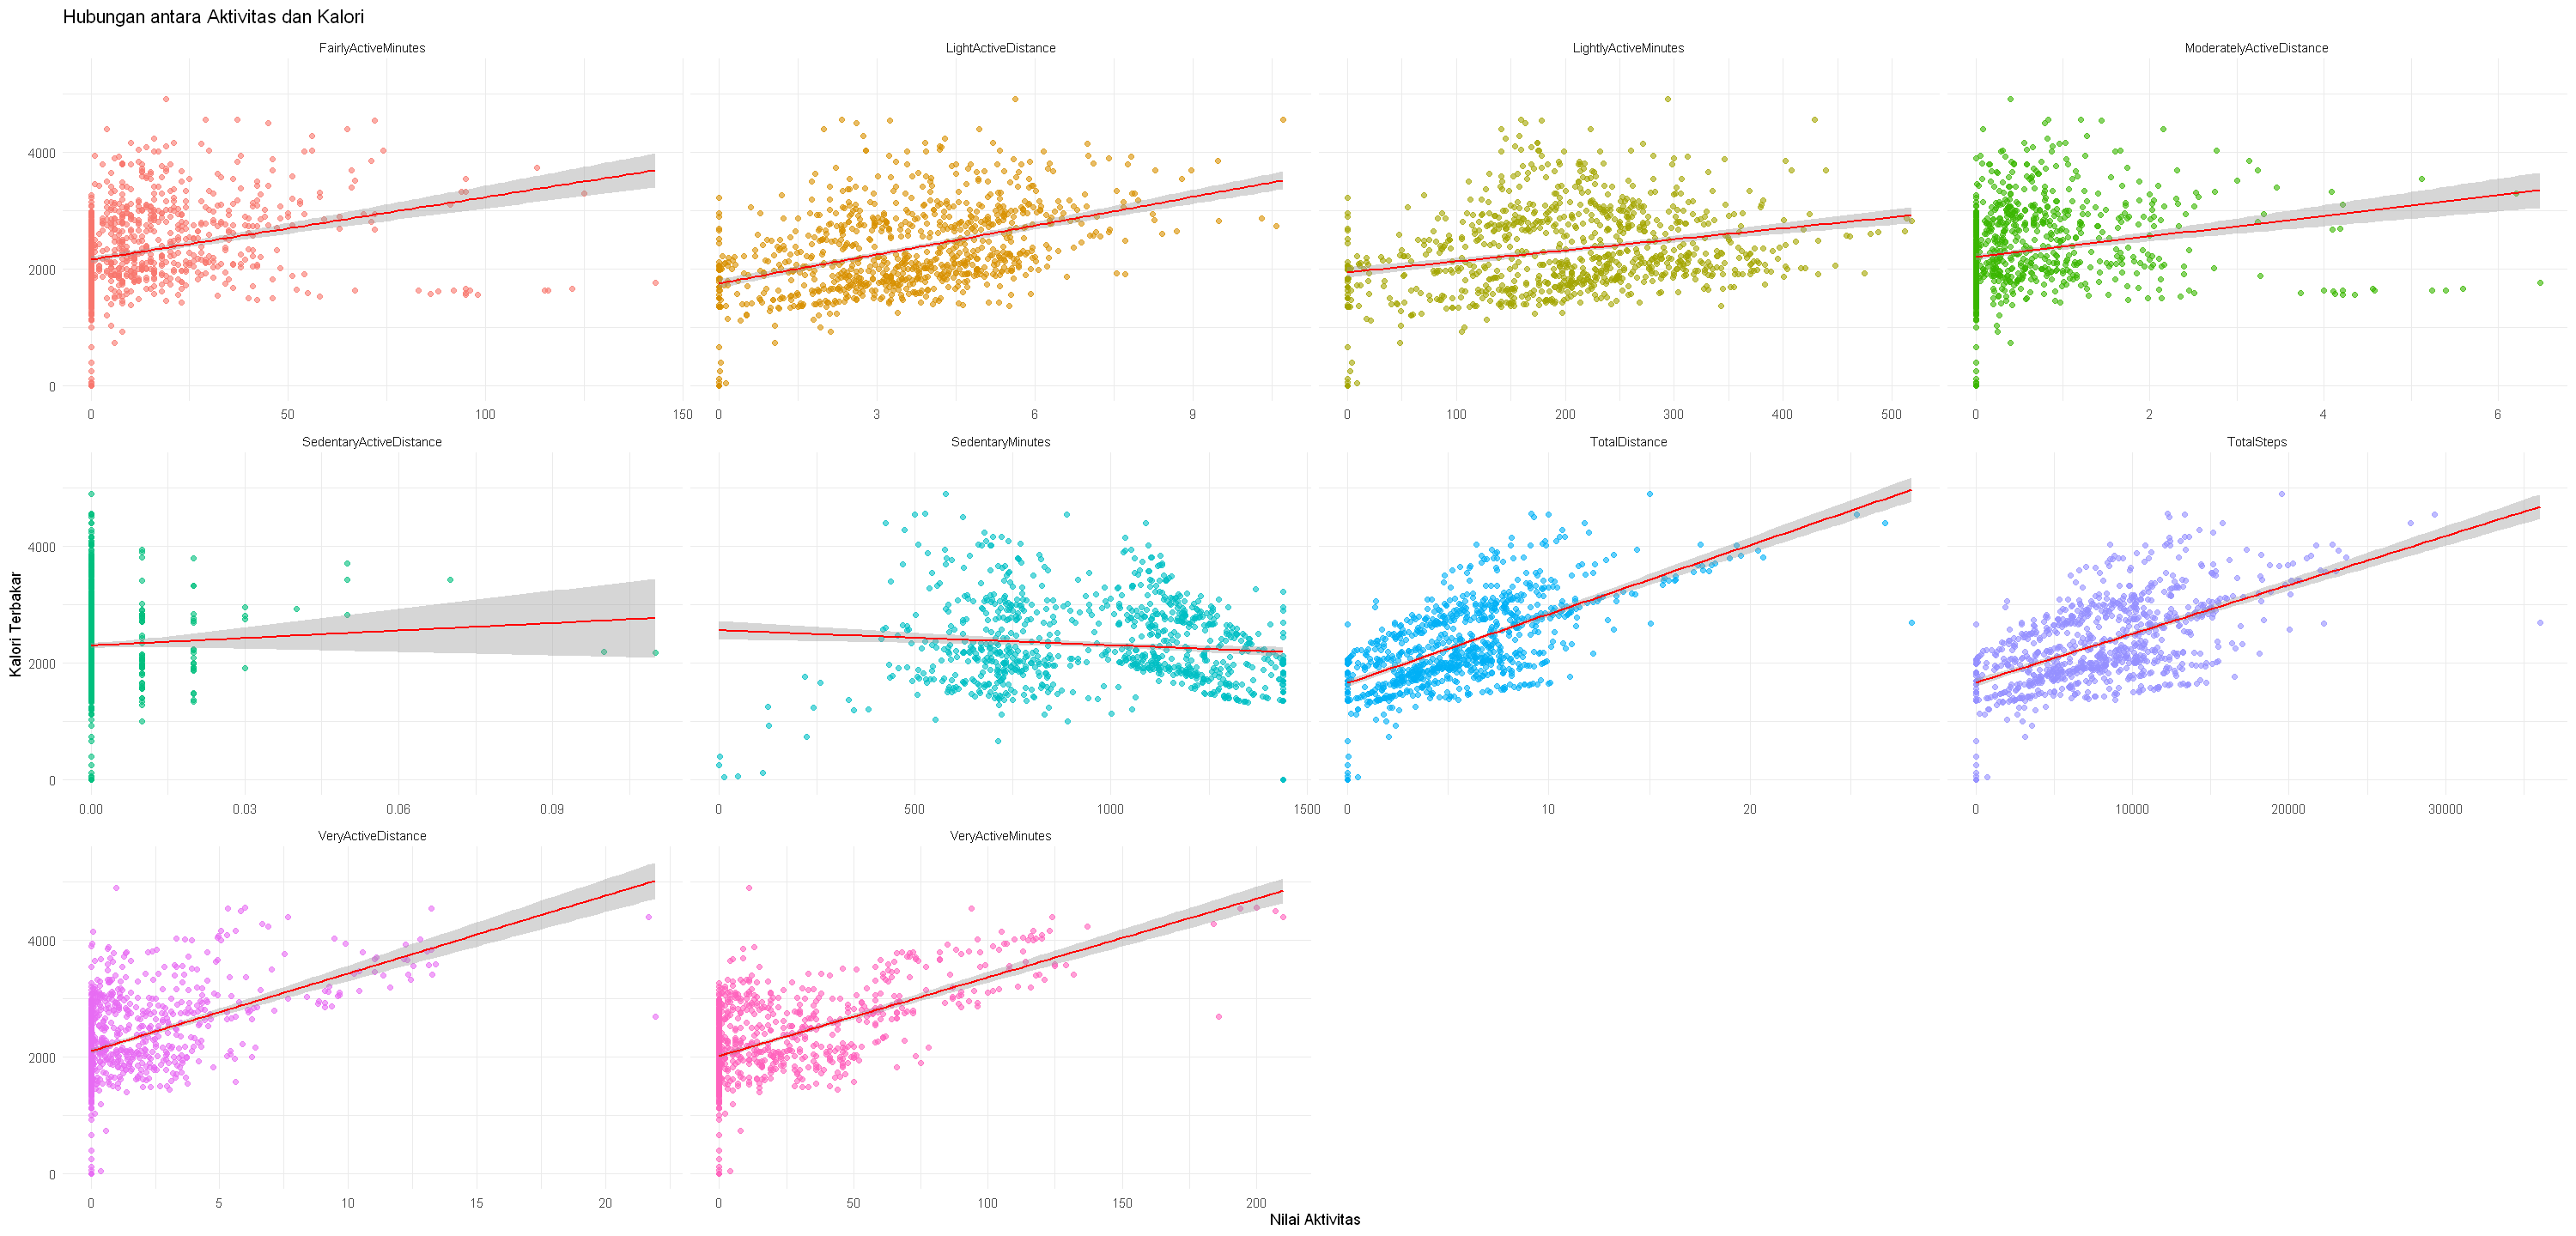

In [140]:

options(repr.plot.width=25, repr.plot.height=12)
# Data pivoting untuk hubungan dengan Calories
data_long <- daily_activities %>% 
  pivot_longer(cols = c(TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes ), 
               names_to = "Activity", 
               values_to = "Value")
               
# Membuat facet wrap scatter plot
ggplot(data_long, aes(x = Value, y = Calories, color = Activity)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", formula = y ~ x,  se = TRUE, color = "red", linewidth = 0.8) +
  facet_wrap(~Activity, scales = "free_x") +
  labs(title = "Hubungan antara Aktivitas dan Kalori",
       x = "Nilai Aktivitas",
       y = "Kalori Terbakar") +
  theme_minimal() +
  theme(legend.position = "none")


### Analisis of Activity type and Calories
-	Very active minutes and very active distance show a strong correlation with the number of calories burned.  
-	Sedentary active distance and sedentary minutes have a weak relationship with calorie burn.  
-	High-intensity activities are more effective at burning calories compared to low-intensity or sedentary activities.  
-	The wide data distribution in activities such as fairly active and lightly active indicates variability in calorie burn based on activity type.  

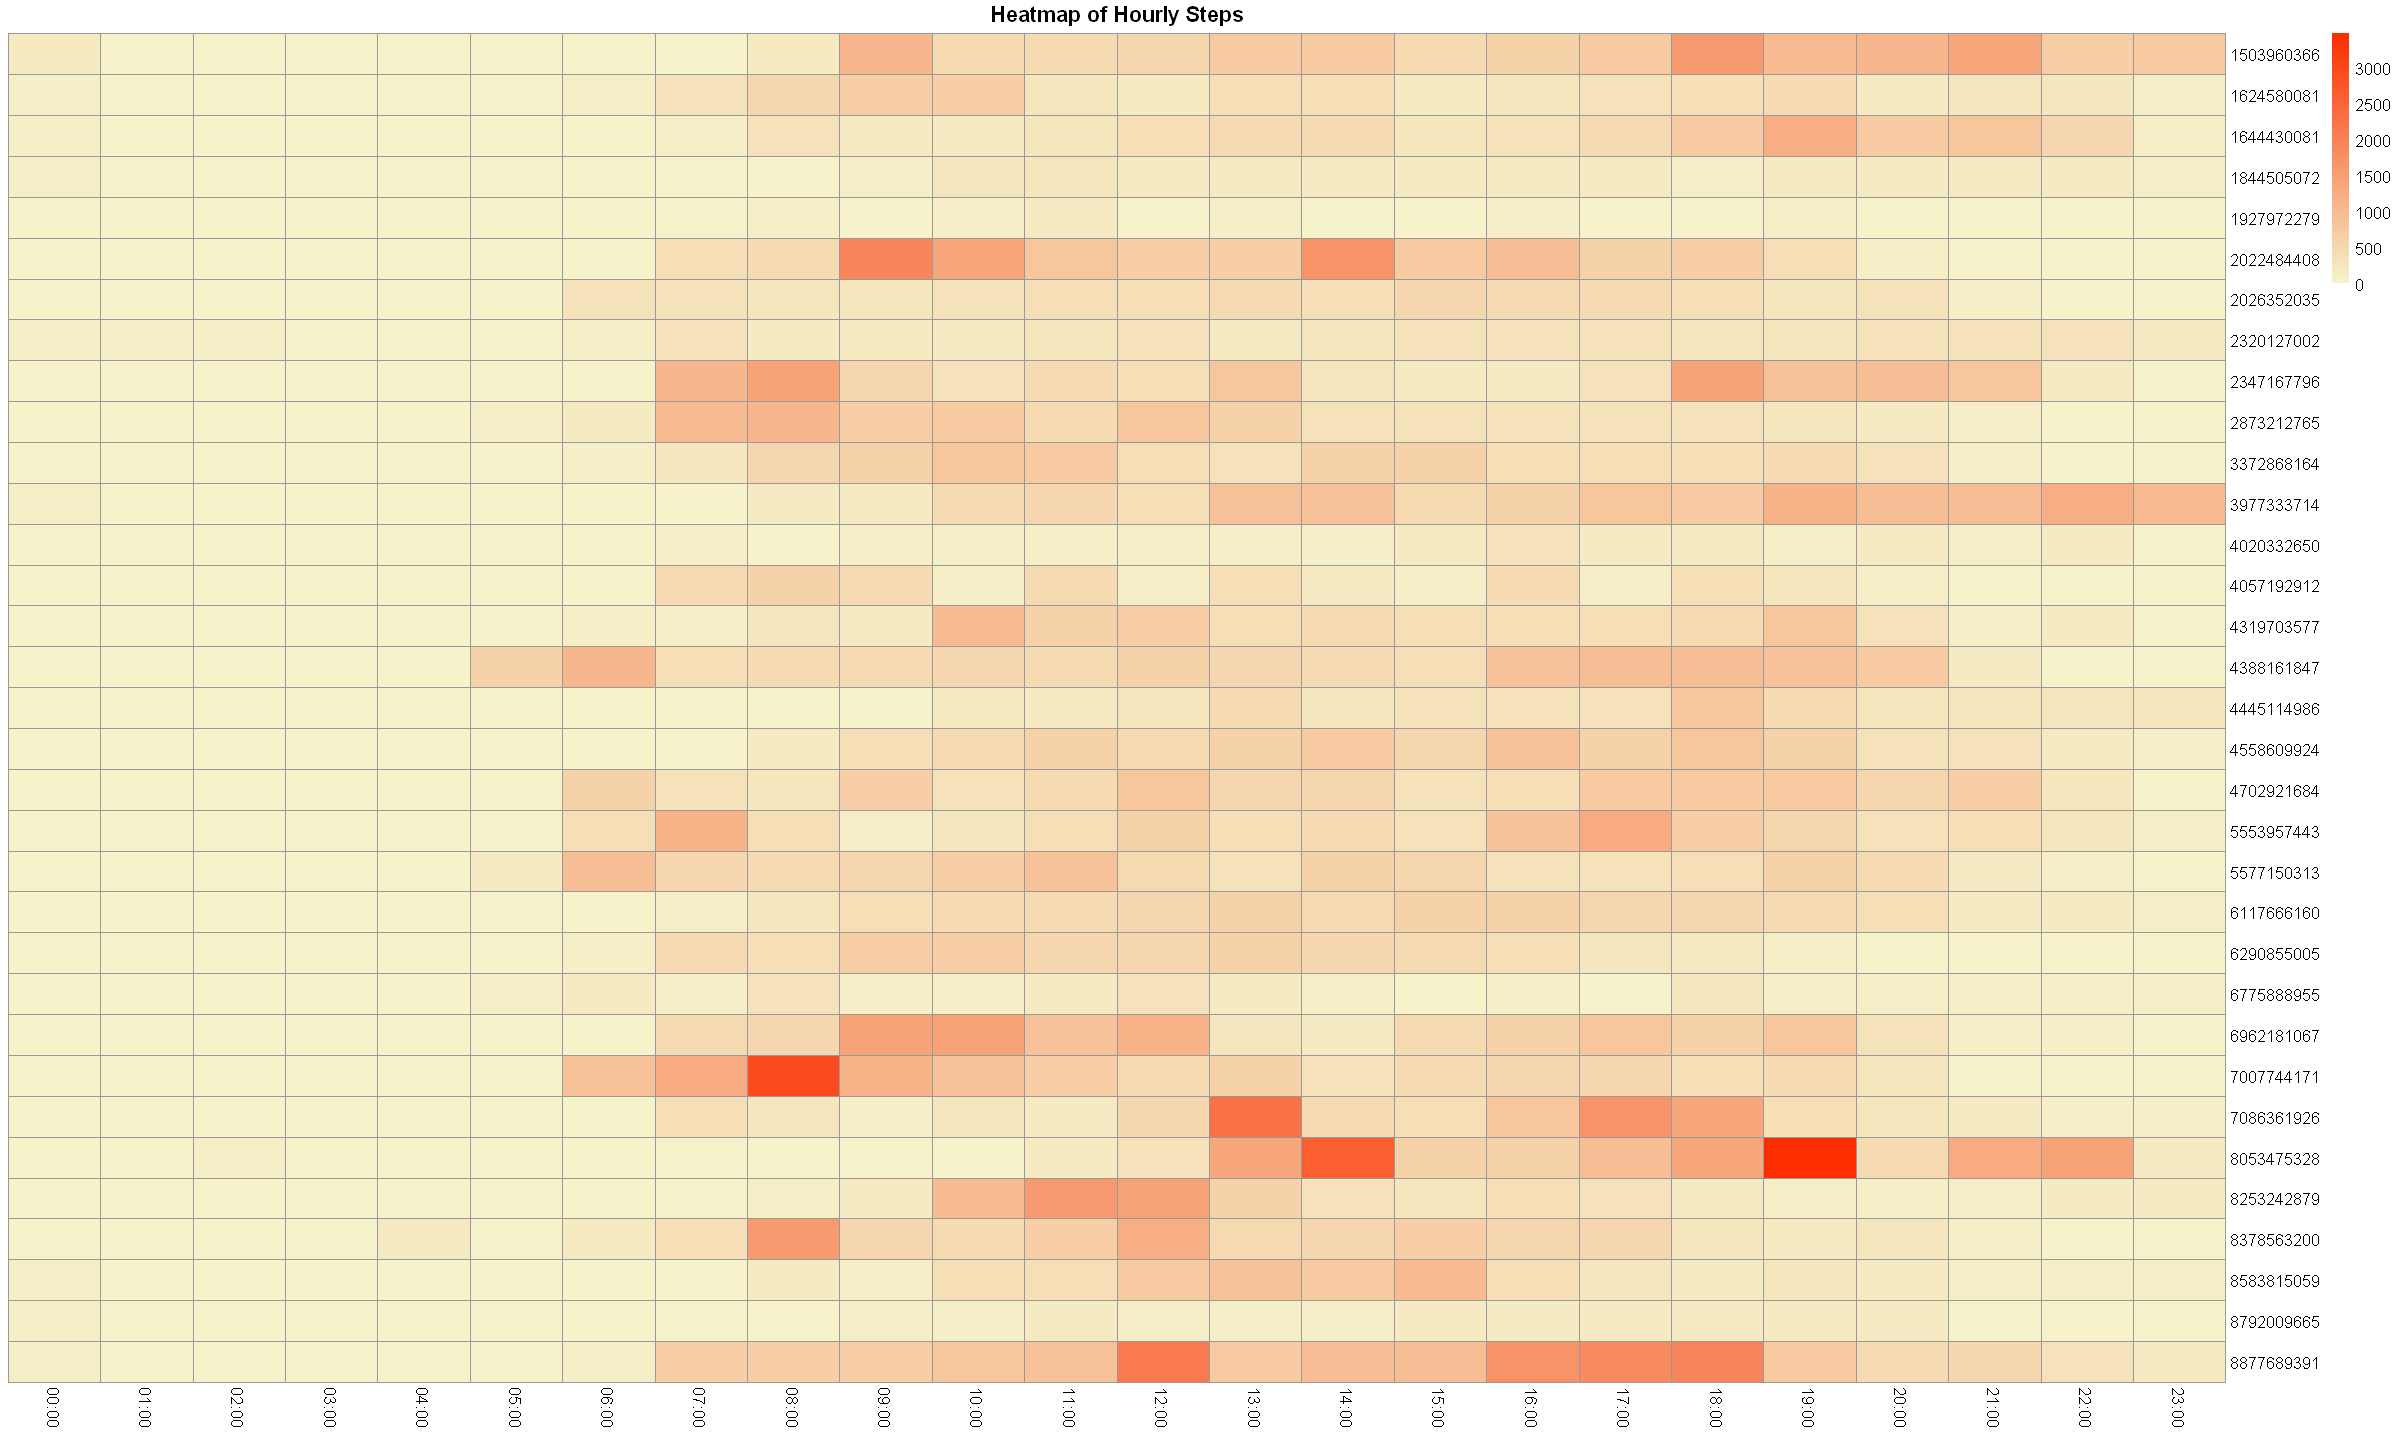

In [146]:
options(repr.plot.width=20, repr.plot.height=12)
Steps_matrix <- reshape2::dcast(hourly_Steps, Id ~ Time, value.var = "AvgStepTotal")
rownames(Steps_matrix) <- Steps_matrix$Id
Steps_matrix <- Steps_matrix[, -1]  # Hapus kolom User (menjadikan baris)

# 3. Buat heatmap
pheatmap(Steps_matrix, 
         color = colorRampPalette(c("#f6f3cb", "#fc2e00"))(50),
         cluster_rows = FALSE, 
         cluster_cols = FALSE,
         main = "Heatmap of Hourly Steps")

### Analysis of Total Steps per Hour per User
-	Darker shades indicate a higher average number of steps during that hour.  
-	Some users exhibit significant patterns of average step activity at specific hours.  
-	Several users tend to be more active from midday to late afternoon, typically during work hours or exercise time.  
-	Morning hours generally show low step activity, likely due to rest or sleep.  

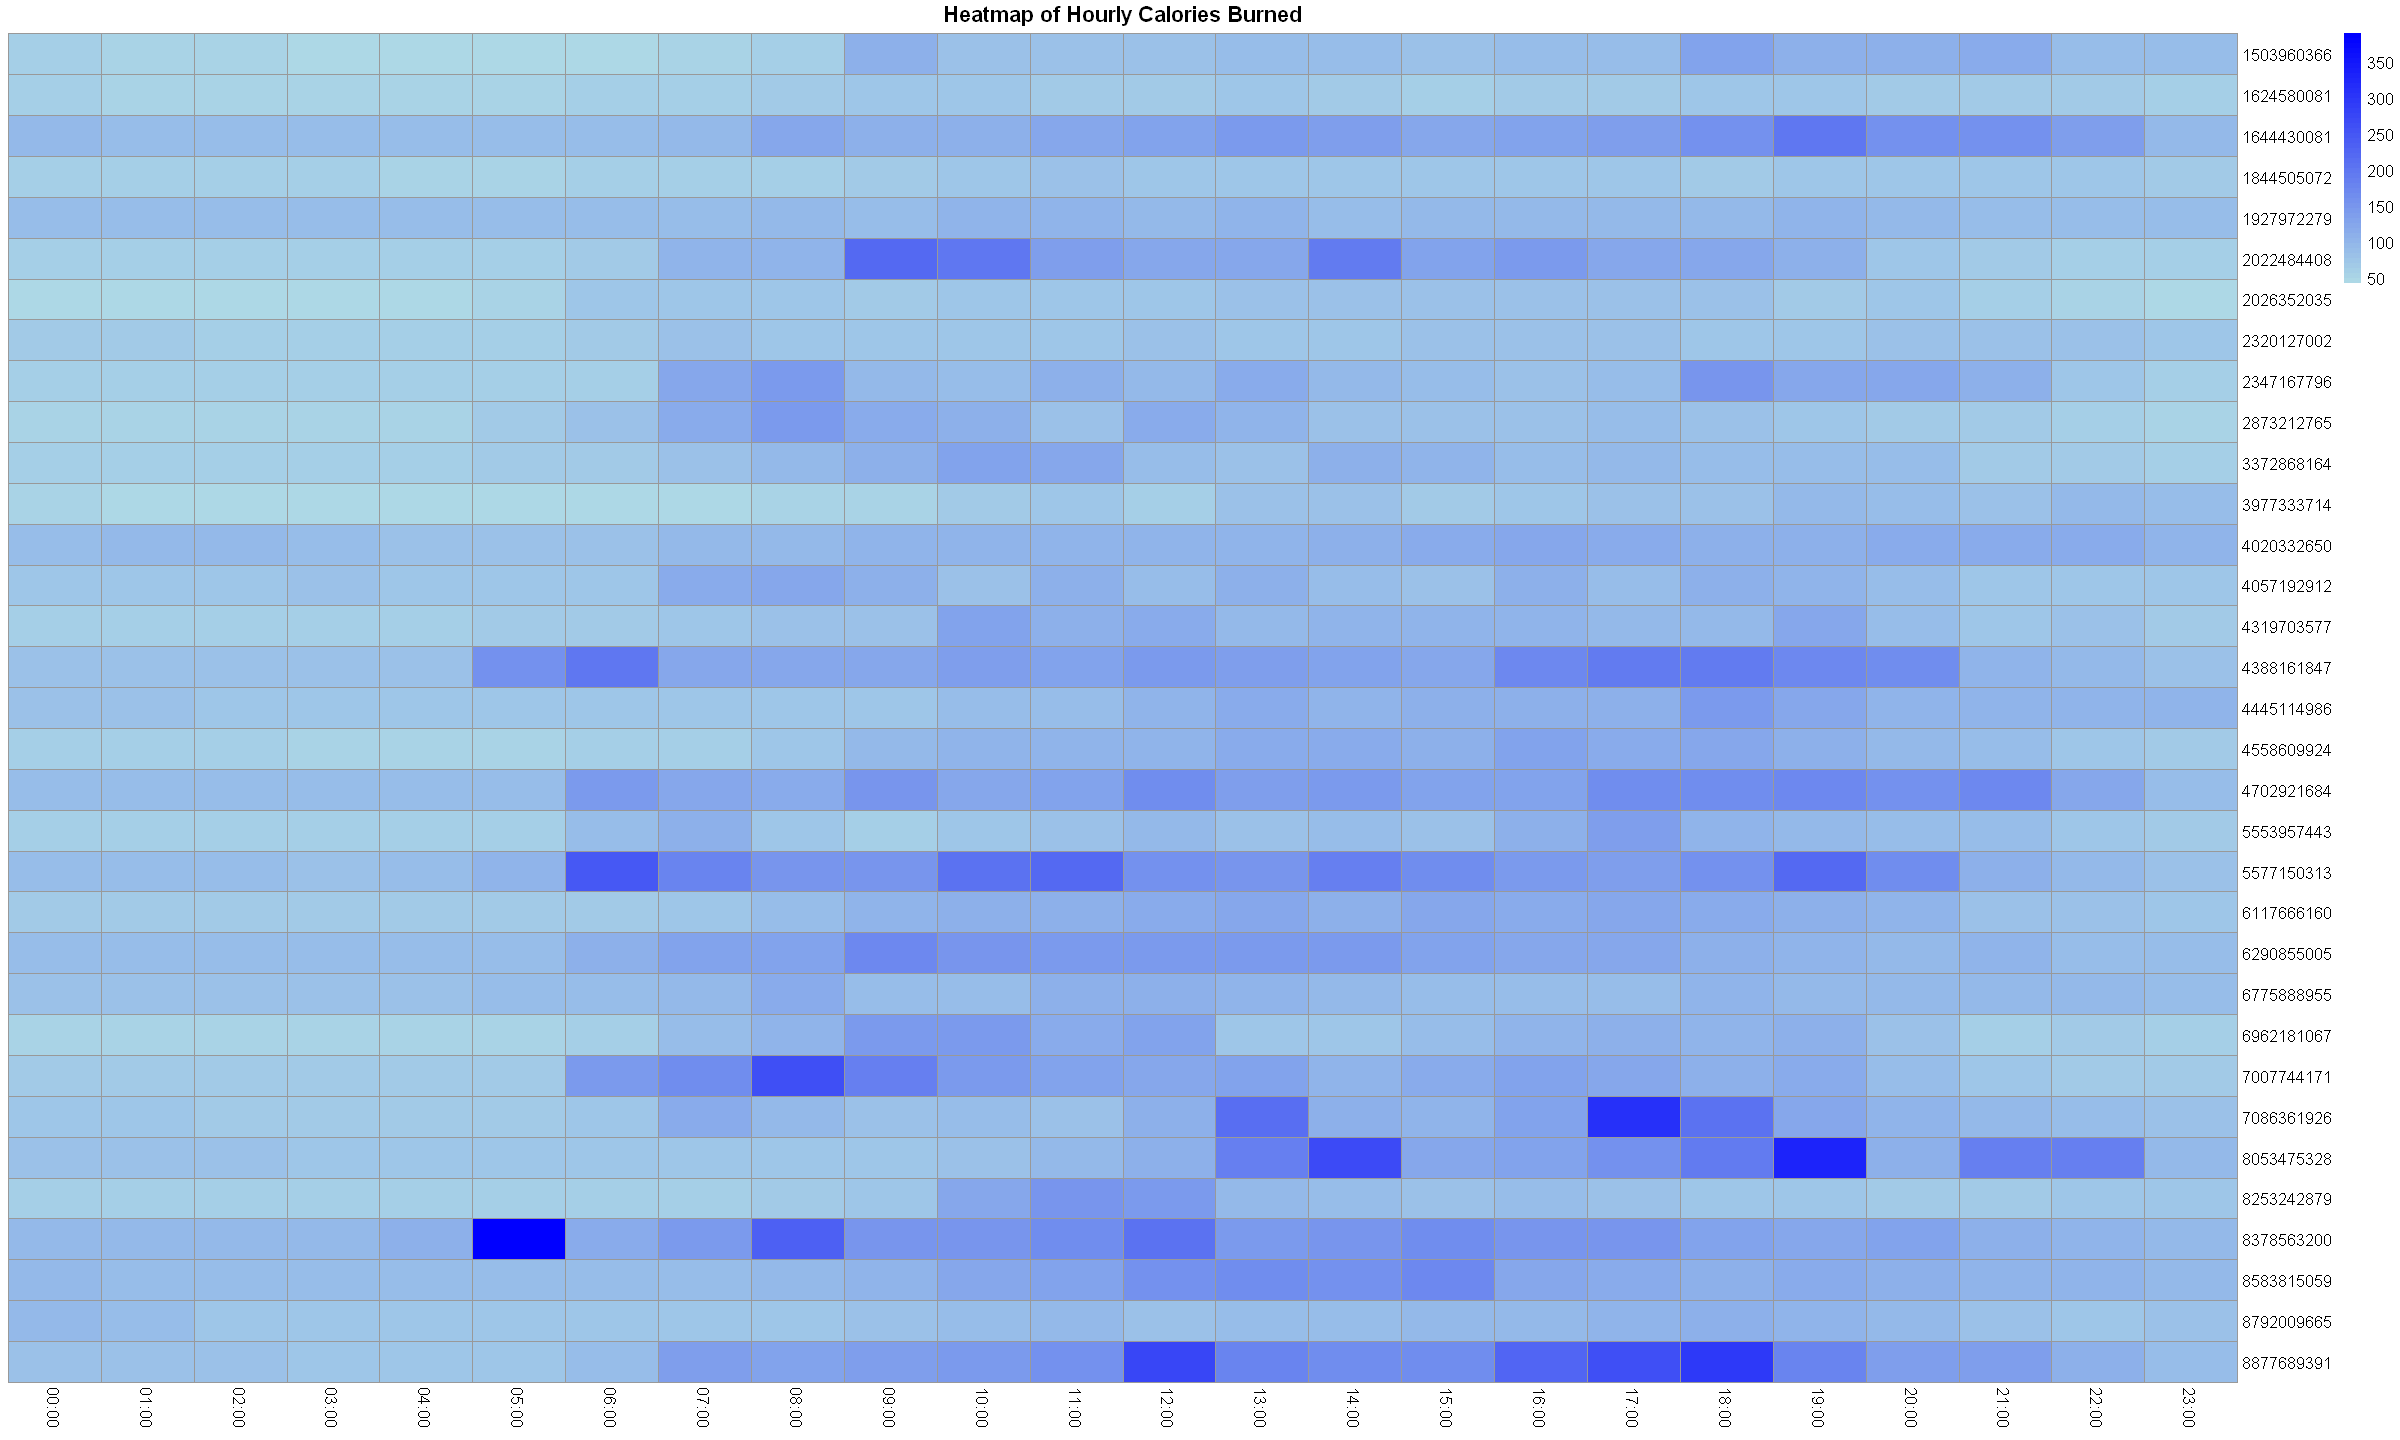

In [142]:
options(repr.plot.width=20, repr.plot.height=12)
Calories_matrix <- reshape2::dcast(hourly_Calories, Id ~ Time, value.var = "AvgCalories")
rownames(Calories_matrix) <- Calories_matrix$Id
Calories_matrix <- Calories_matrix[, -1]  # Hapus kolom User (menjadikan baris)

# 3. Buat heatmap
pheatmap(Calories_matrix, 
         color = colorRampPalette(c("lightblue", "blue"))(50),
         cluster_rows = FALSE, 
         cluster_cols = FALSE,
         main = "Heatmap of Hourly Calories Burned")

### Analysis of Calories Burned per Hour
- Darker shades indicate higher calorie burn.
- The intensity of calorie burn varies between users at specific times, possibly reflecting higher activity levels during the evening or daytime.
- Hours with low activity (light blue) likely correspond to sleep time.

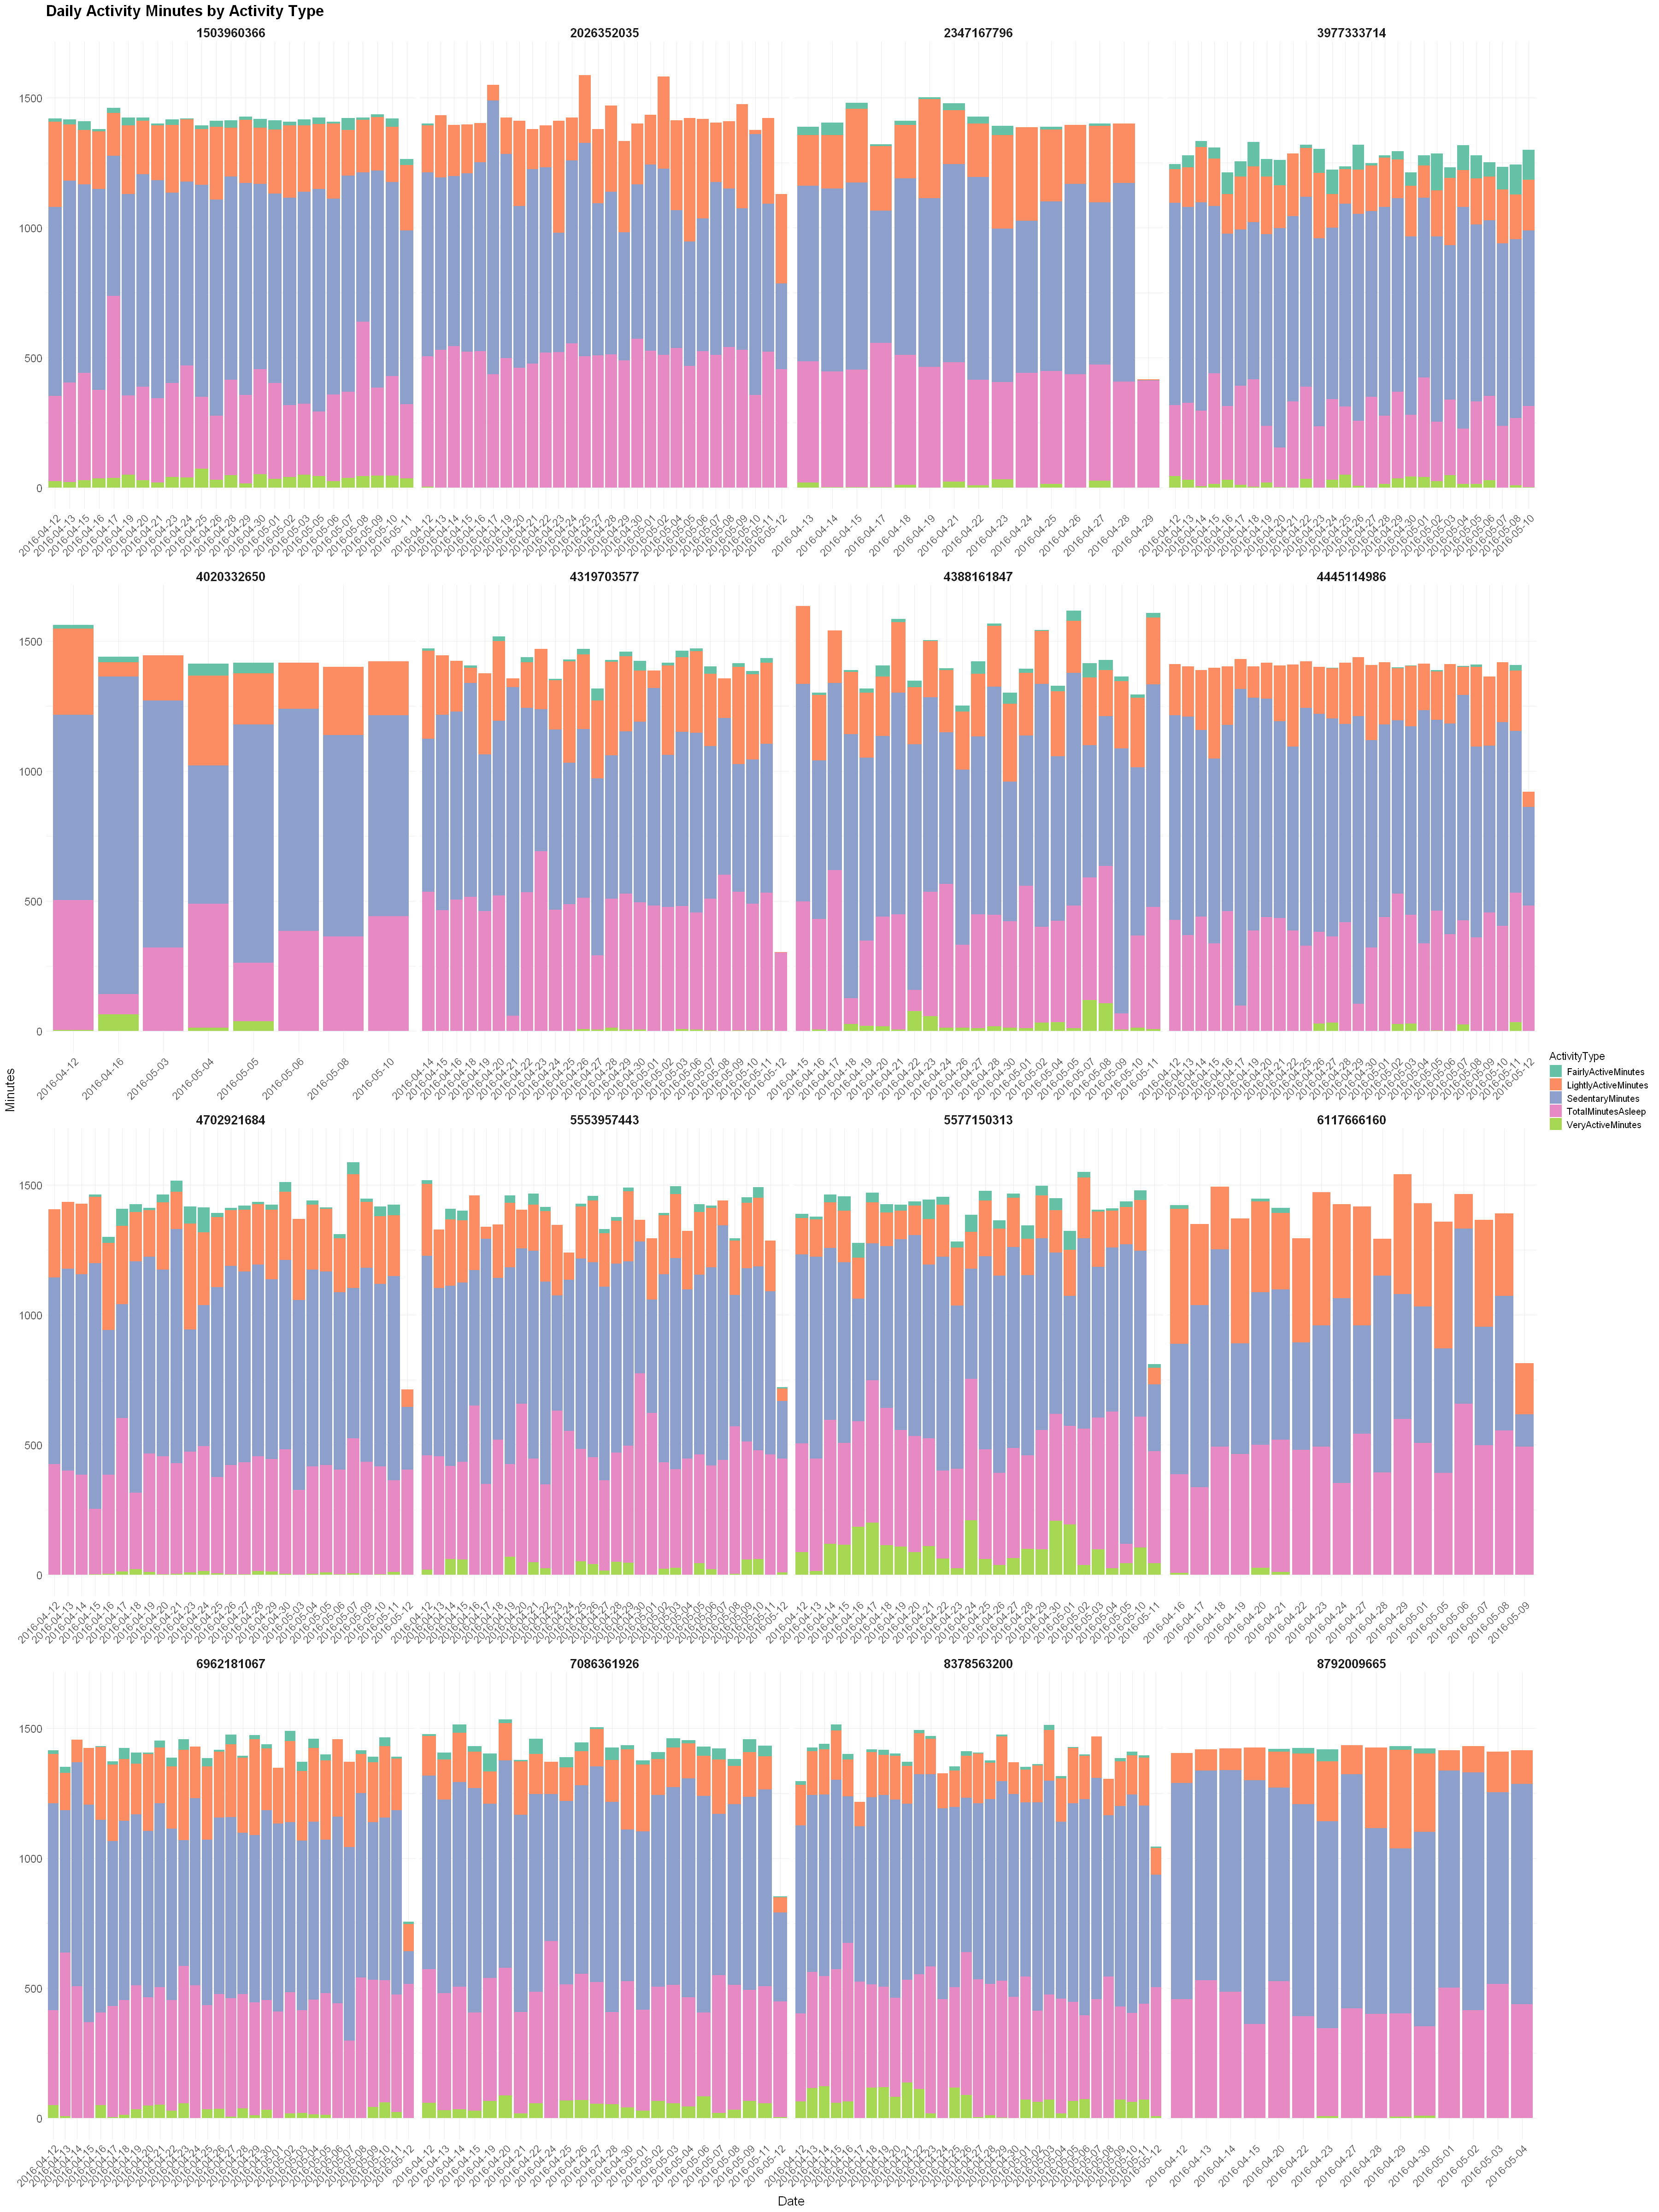

In [143]:

options(repr.plot.width=30, repr.plot.height=40)
sleep_intensities_long <- sleep_intensities %>%
  pivot_longer(cols = c(SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes, TotalMinutesAsleep),
               names_to = "ActivityType", values_to = "Minutes")

# Membuat grafik bar bertumpuk
ggplot(sleep_intensities_long, aes(x = factor(Date), y = Minutes, fill = ActivityType)) +
  geom_bar(stat = "identity", position = "stack") + # Bar bertumpuk
  facet_wrap(~Id, scales = "free_x",ncol = 4) + # Memisahkan grafik per Id
  labs(title = "Daily Activity Minutes by Activity Type",
       x = "Date",
       y = "Minutes") +
  scale_fill_brewer(palette = "Set2") + # Palet warna
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(size = 20, face = "bold"),       # Mengatur ukuran judul
    axis.title = element_text(size = 16),                     # Mengatur ukuran sumbu x dan y
    axis.text = element_text(size = 14),                      # Mengatur ukuran angka pada sumbu
    legend.text = element_text(size = 12),                    # Mengatur ukuran teks legenda
    legend.title = element_text(size = 14),                   # Mengatur ukuran judul legenda
    strip.text = element_text(size = 16, face = "bold"))       

  # ggplot(data = hr_intensities_long, aes(x = factor(Hour), y = Value, fill = `Value of`)) +
  # geom_bar(stat = "identity", position = "dodge", color = "black") +
  # facet_wrap(~Id, scales = "free_x", ncol = 3) +
  # scale_fill_manual(values = c("AvgHeartRate" = "skyblue", "AvgIntensity" = "#2b93f4")) +
  # labs(title = "HR-Intensities Each Hour",
  #      x = "Hour",
  #      y = "Values") +
  # theme_minimal()

### Analysis of Sleep Duration and Activity Types
-	Each color in the bar chart represents a specific type of activity (such as sleeping, working, exercising, etc.).
- The average sleep duration varies among users each day. This can help identify users who do not meet the recommended 7–9 hours of daily sleep.  
-	Users generally show similar activity patterns from day to day, though some do not exhibit consistent routines.  
-	Some users may only engage in moderate activities, while others demonstrate *very active minutes,* possibly indicating exercise.  

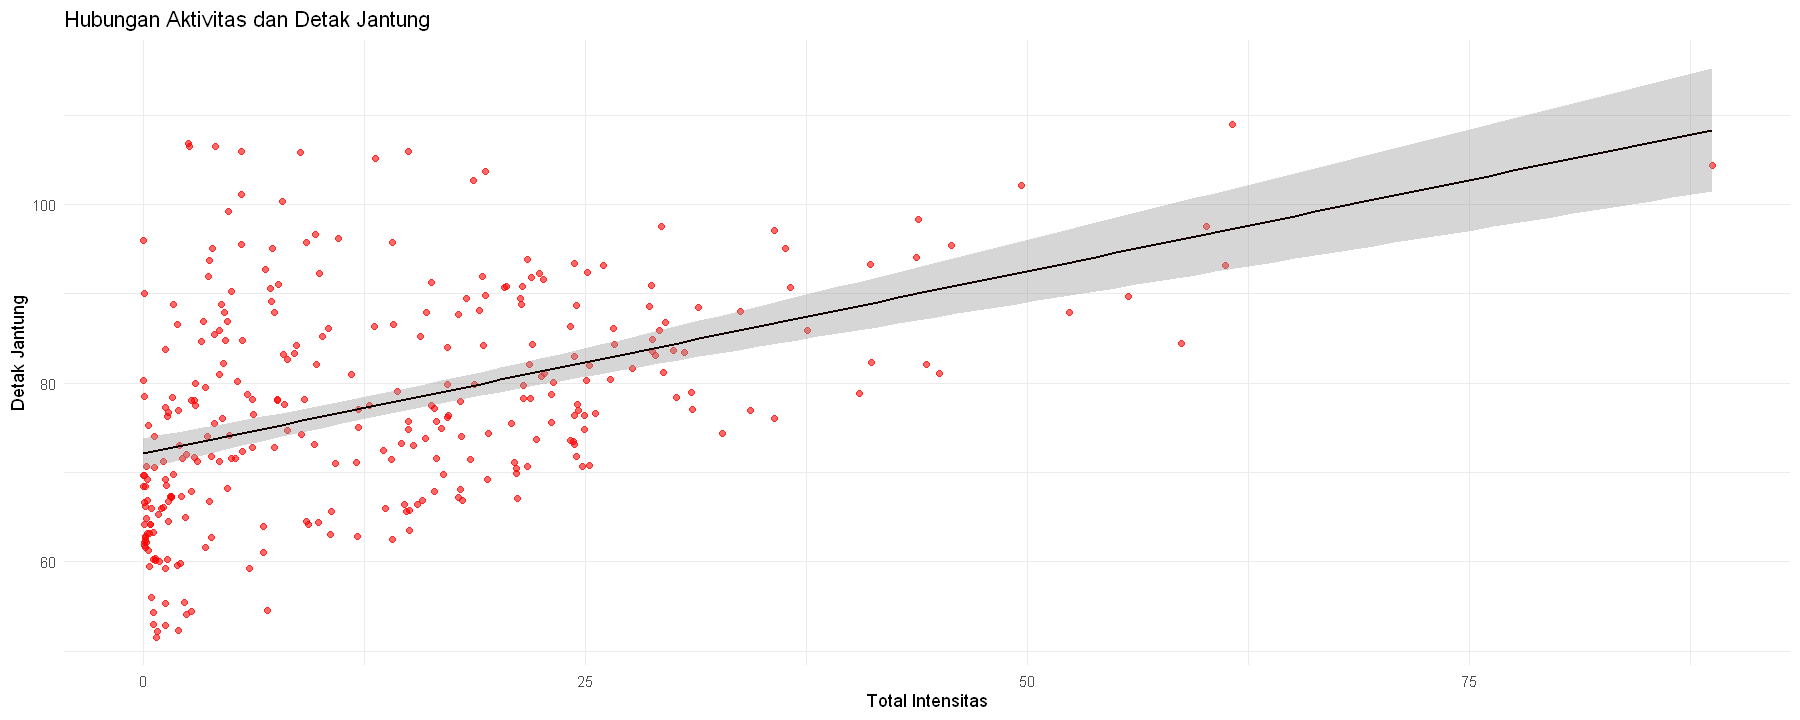

In [144]:
library(reshape2)

# hr_intensities$Hour <- format(as.POSIXct(hr_intensities$Hour, format = "%m/%d/%Y %I:%M %p"), "%H")
# hr_intensities$Date <- format(as.POSIXct(hr_intensities$Hour, format = "%m/%d/%Y %I:%M %p"), "%Y-%m-%d")

# heatmap_data <- dcast(hr_intensities, Hour, value.var = "AvgIntensity", fun.aggregate = sum)

options(repr.plot.width=15, repr.plot.height=6)

# ggplot(melt(heatmap_data), aes(Var2, Var1, fill = value)) +
#   geom_tile(color = "white") +
#   scale_fill_gradient(low = "blue", high = "red") +
#   labs(title = "Heatmap Intensitas Aktivitas", x = "Jam", y = "Tanggal") +
#   theme_minimal()

ggplot(hr_intensities, aes(x = AvgIntensity, y = AvgHeartRate)) +
  geom_point(color = "red", alpha = 0.6) +
  geom_smooth(method = "lm", formula = y ~ x,  se = TRUE, color = "#100101", linewidth = 0.8) +
  labs(title = "Hubungan Aktivitas dan Detak Jantung", x = "Total Intensitas", y = "Detak Jantung") +
  theme_minimal()

### Analysis of Activity and Heart Rate
-	Shows a fairly strong correlation, with heart rate changing based on different types of activity

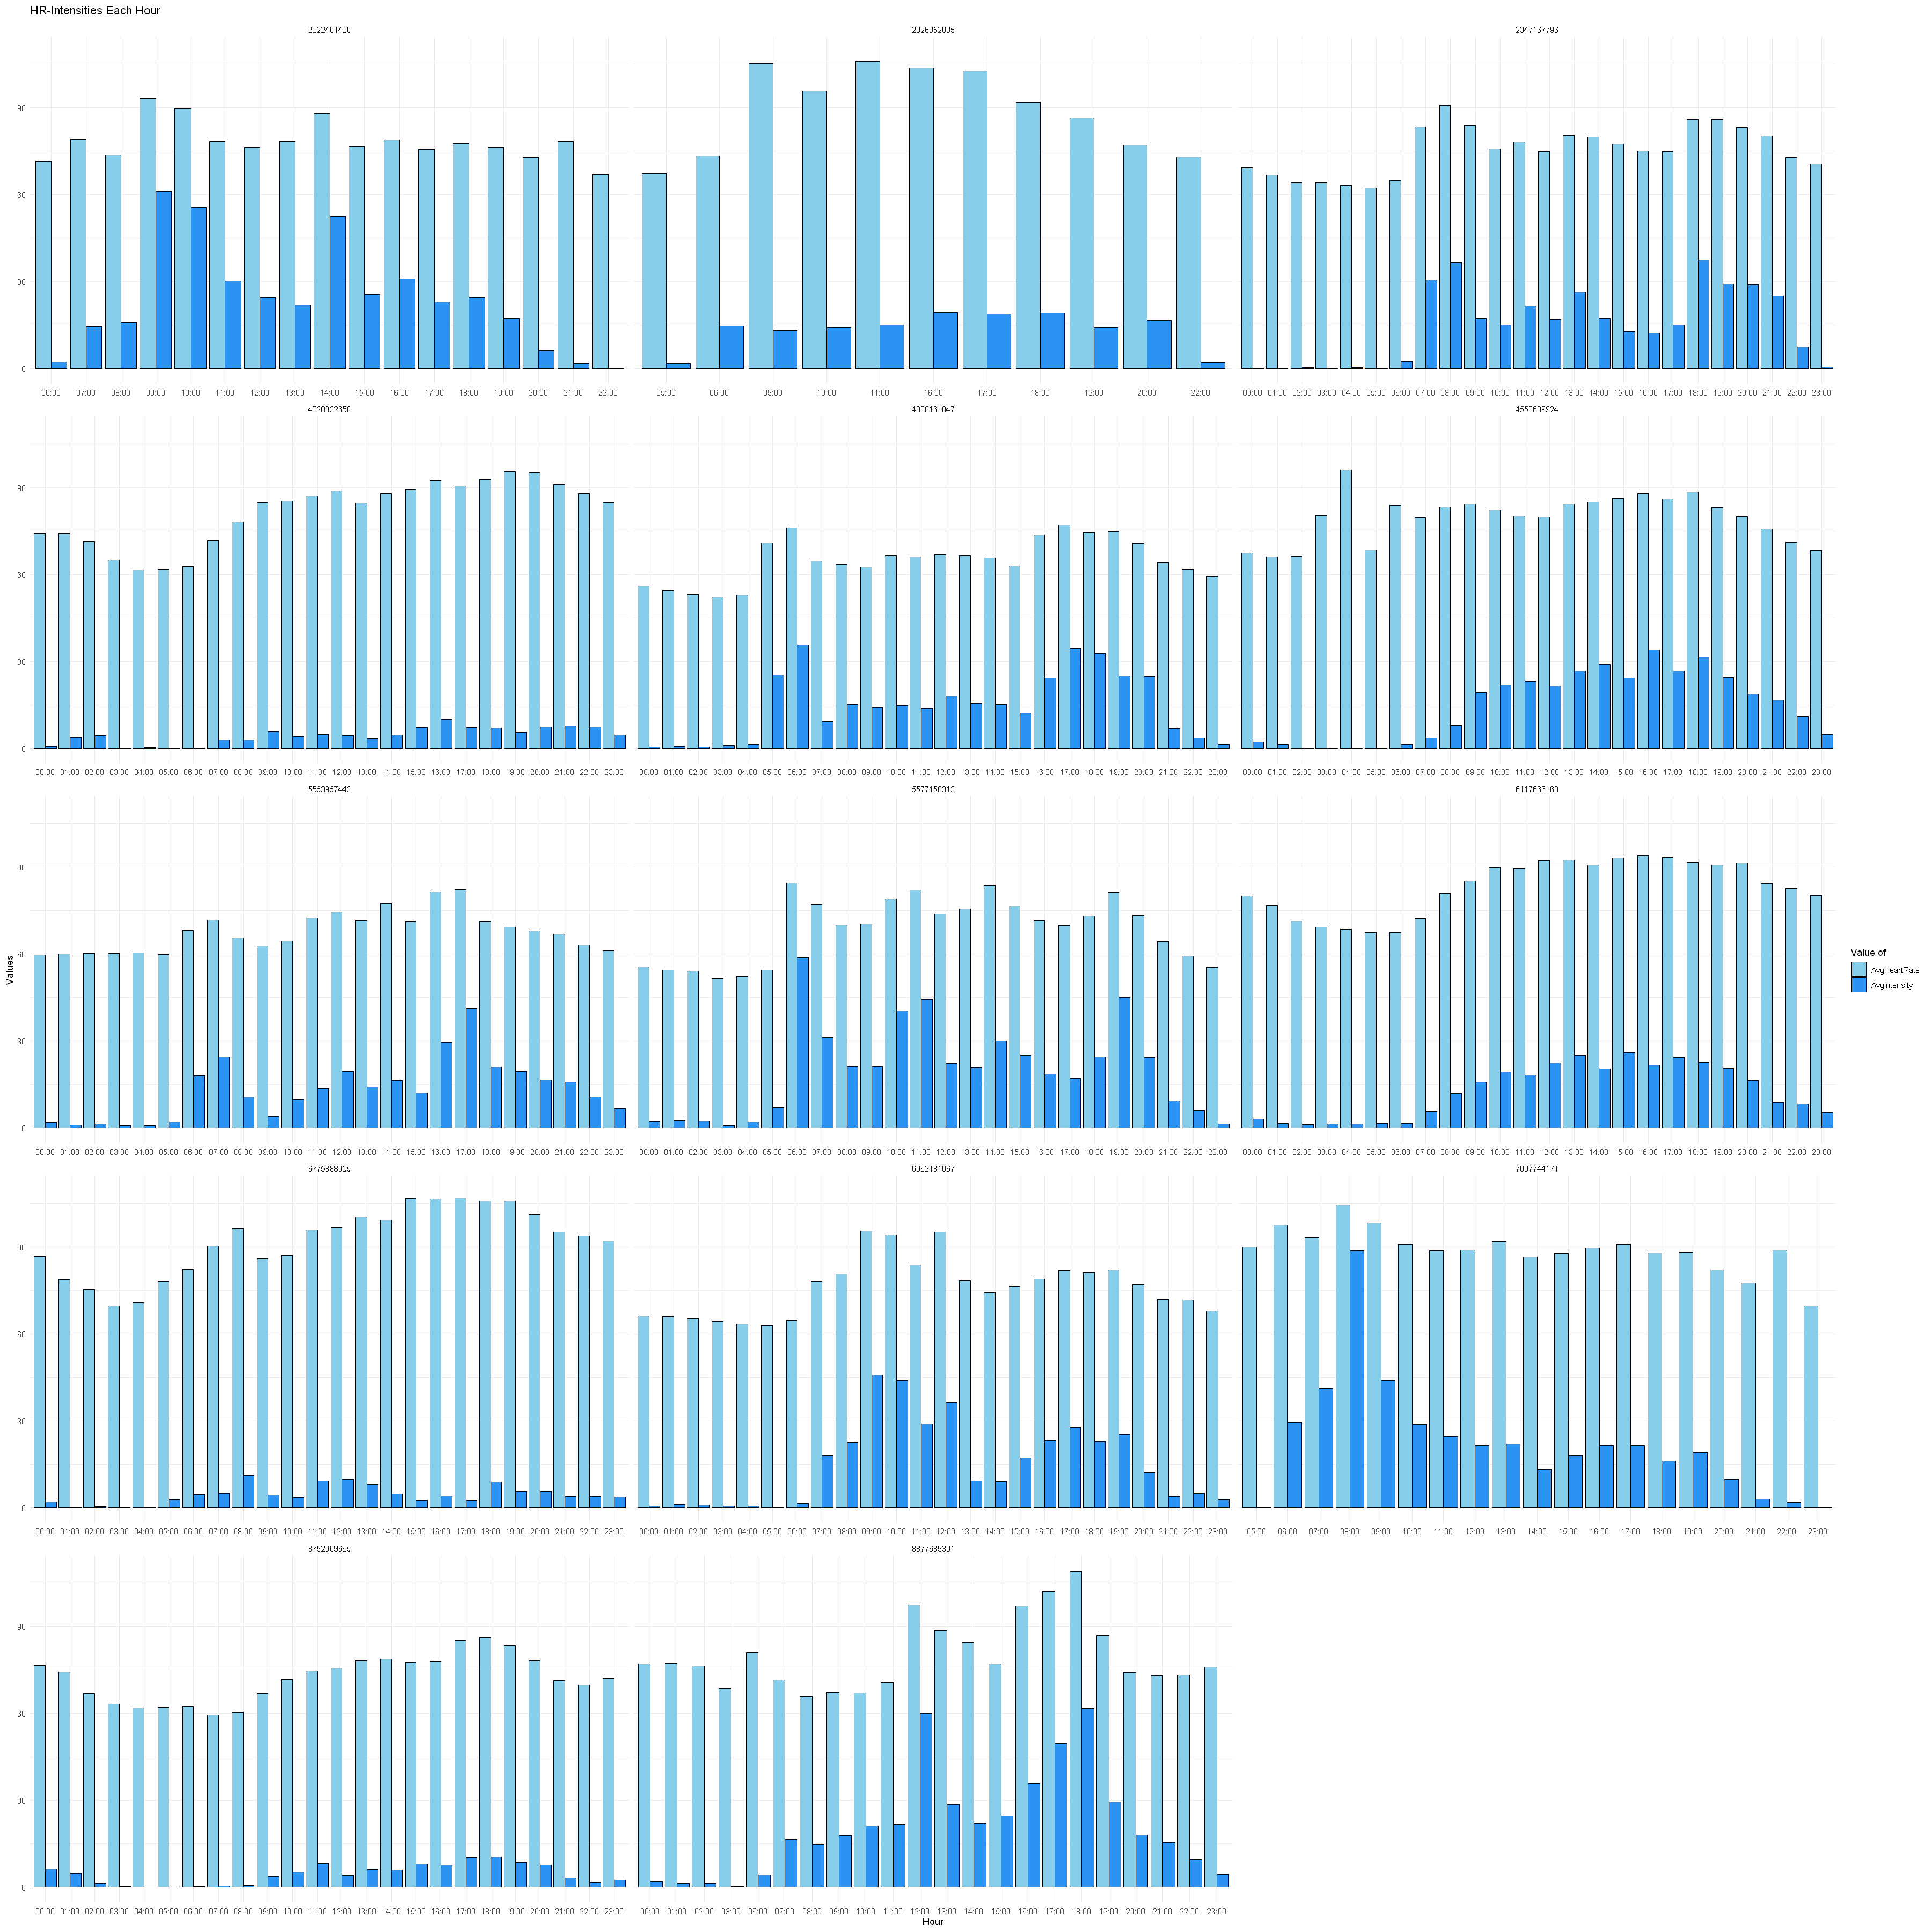

In [145]:
options(repr.plot.width=30, repr.plot.height=30)

hr_intensities_long <- hr_intensities %>%
  pivot_longer(cols = c(AvgHeartRate, AvgIntensity), 
               names_to = "Value of", 
               values_to = "Value")

ggplot(data = hr_intensities_long, aes(x = factor(Hour), y = Value, fill = `Value of`)) +
  geom_bar(stat = "identity", position = "dodge", color = "black") +
  facet_wrap(~Id, scales = "free_x", ncol = 3) +
  scale_fill_manual(values = c("AvgHeartRate" = "skyblue", "AvgIntensity" = "#2b93f4")) +
  labs(title = "HR-Intensities Each Hour",
       x = "Hour",
       y = "Values") +
  theme_minimal()

#mencakup hr jd harus ada nilainya

### Analysis of Activity and Heart Rate  
-	Typically, the more intense the activity, the higher the heart rate.  
-	However, there are instances where intensity increases but the heart rate remains low, which could indicate that the activity is not very intense but is performed for a long duration.  
-	Some users have more random daily activity patterns, resulting in fluctuations in heart rate.  
-	Users with consistently low heart rate and high intensity may require attention, as this could indicate physical activity that is not very intense but prolonged, which might affect health differently compared to activities with higher heart rates over shorter periods.

#  Share and Act

 ### Recommendation for Bellabeat Apps

1. **Personalized Activity and Sleep Recommendations**  
   The app could provide personalized suggestions for users to meet the recommended 7-9 hours of sleep, based on their current sleep patterns and activity levels. It could also suggest adjustments in daily routines if their sleep is insufficient.

2. **Enhanced Heart Rate Monitoring**  
   Implement features that notify users when their heart rate is unusually low or high during certain activities. This can help them monitor their physical health better and avoid overexertion or prolonged, low-intensity activities that may have an unexpected impact on their health.

3. **Activity Intensity Insights**  
   Offer insights into how different activities (moderate vs. very active) affect heart rate and calories burned. The app could encourage users to engage in higher-intensity activities for better calorie burn and cardiovascular health, while also tracking progress over time.

4. **Activity Reminders and Notifications**  
   Based on patterns, the app could send reminders for users to stay active or rest, particularly if they’re not meeting daily activity or sleep goals. For example, if a user has low activity in the morning or after work, they could receive notifications suggesting a quick workout.


*Hello, I'm Ayunda from Biomedical Engineering. I'm enthusiastic about learning data analytics, and here is my analysis from the Google Data Analytics project. Thank you for reading!*